In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    e = y - (tx @ np.vstack(w)).flatten()
    return np.linalg.norm(e)**2 / (2*N)

In [5]:
compute_loss(y, tx, np.vstack([1,2]))

2694.483365887085

# 2 Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w_0 in enumerate(w0):
        for j, w_1 in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.vstack([w_0, w_1]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609525, w0*=72.72727272727272, w1*=13.636363636363626, execution time=1.477 seconds


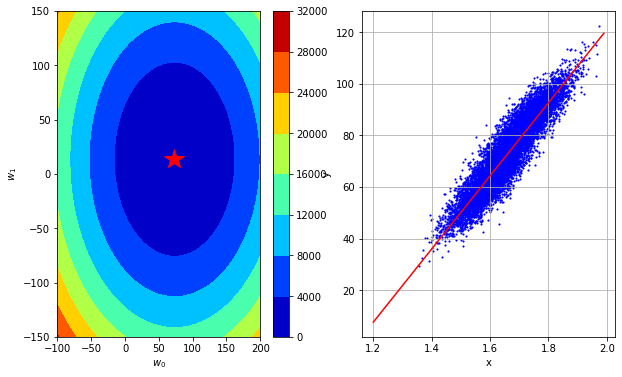

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [59]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    e = y - (tx @ np.vstack(w)).flatten()
    return (-1/N) * (tx.T @ e)

In [60]:
compute_gradient(y, tx, np.vstack([100, 20]))

array([26.706078  ,  6.52028757])

In [61]:
compute_gradient(y, tx, np.vstack([50, 10]))

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [62]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        dw = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * dw
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [83]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=378.04738819875894, w0=97.32939220021052, w1=10.347971243498911
Gradient Descent(1/49): loss=309.1417031360723, w0=94.92584518039999, w1=10.661145362647925
Gradient Descent(2/49): loss=253.32809823529618, w0=92.7626528625705, w1=10.943002069882041
Gradient Descent(3/49): loss=208.11907826566738, w0=90.81577977652397, w1=11.196673106392746
Gradient Descent(4/49): loss=171.49977209026812, w0=89.06359399908209, w1=11.424977039252378
Gradient Descent(5/49): loss=141.8381340881947, w0=87.4866267993844, w1=11.630450578826046
Gradient Descent(6/49): loss=117.81220730651526, w0=86.06735631965648, w1=11.815376764442348
Gradient Descent(7/49): loss=98.35120661335503, w0=84.79001288790136, w1=11.981810331497023
Gradient Descent(8/49): loss=82.58779605189517, w0=83.64040379932173, w1=12.131600541846227
Gradient Descent(9/49): loss=69.8194334971126, w0=82.60575561960007, w1=12.26641173116051
Gradient Descent(10/49): loss=59.47705982773877, w0=81.67457225785058, w1=12.38

In [84]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [95]:
from helpers import batch_iter
def compute_stoch_gradient(y, tx, w):
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter, data in enumerate(batch_iter(y, tx, batch_size, num_batches=max_iters)):
        y_batch, tx_batch = data
        dw = compute_stoch_gradient(y_batch, tx_batch, w)
        loss = compute_loss(y_batch, tx_batch, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * dw
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [96]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=4762.369807390274, w0=68.31634073369612, w1=127.11065675584481
Gradient Descent(1/49): loss=3834.528297689527, w0=129.61754571154086, w1=88.79032549568925
Gradient Descent(2/49): loss=11773.113102962301, w0=22.204088263681683, w1=-39.47555579853835
Gradient Descent(3/49): loss=160.43917257228046, w0=9.664934021036974, w1=-23.919141762707227
Gradient Descent(4/49): loss=1142.4200582766264, w0=43.124934874460365, w1=-32.81826834829377
Gradient Descent(5/49): loss=17.713509108043215, w0=47.29137687284248, w1=-35.19451820653933
Gradient Descent(6/49): loss=2332.595468414423, w0=95.10291898399106, w1=1.910065234943744
Gradient Descent(7/49): loss=118.74944892864254, w0=84.31521950958644, w1=3.8033876278660035
Gradient Descent(8/49): loss=48.503291506283155, w0=77.42078511101846, w1=3.9561702121271787
Gradient Descent(9/49): loss=59.88487271990831, w0=69.76002958264463, w1=8.82737177879256
Gradient Descent(10/49): loss=3.0394677630240197, w0=68.03414476384486, w1

In [97]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [117]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

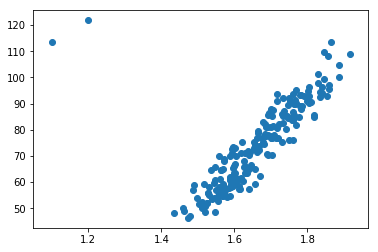

In [118]:
plt.scatter(height, weight)

In [119]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2549.60778280151, w0=49.98615435443578, w1=0.45900720822421626
Gradient Descent(1/49): loss=128.1419364163002, w0=61.19236235214733, w1=-2.7547657455160848
Gradient Descent(2/49): loss=50.33708132299525, w0=68.21591840991005, w1=-0.7604684838505709
Gradient Descent(3/49): loss=1.7676601185164673, w0=69.53208971948419, w1=-0.9676227862735707
Gradient Descent(4/49): loss=146.16110339543658, w0=57.56388679141149, w1=15.733106424593144
Gradient Descent(5/49): loss=102.54968872808837, w0=67.58879052927983, w1=27.780035655583603
Gradient Descent(6/49): loss=465.0203674747371, w0=88.9363889919932, w1=-9.16420631582885
Gradient Descent(7/49): loss=497.4868234663443, w0=66.85614698704639, w1=2.0880590765096816
Gradient Descent(8/49): loss=41.18979261997863, w0=73.20957100623313, w1=4.491333466017698
Gradient Descent(9/49): loss=100.69557425675428, w0=83.14343544921901, w1=16.96787428277097
Gradient Descent(10/49): loss=98.21174063711601, w0=73.33285412982852, w1=8.1

In [120]:
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [131]:
def compute_mae_loss(y, tx, w):
    N = y.shape[0]
    e = np.abs(y - (tx @ np.vstack(w)).flatten())
    return np.sum(e) / N

def compute_subgradient(y, tx, w):
    N = y.shape[0]
    e = y - (tx @ np.vstack(w)).flatten()
    e_sign = np.sign(e)
    return (-1/N) * tx.T @ e_sign

In [137]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        dw = compute_subgradient(y, tx, w)
        loss = compute_mae_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * dw
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [141]:

max_iters = 50
gamma = 3
batch_size = 1

w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=74.06780585492638, w0=3.0000000000000018, w1=3.101685575046531e-15
Gradient Descent(1/49): loss=71.06780585492638, w0=6.0000000000000036, w1=6.203371150093062e-15
Gradient Descent(2/49): loss=68.06780585492638, w0=9.000000000000005, w1=9.305056725139593e-15
Gradient Descent(3/49): loss=65.06780585492638, w0=12.000000000000007, w1=1.2406742300186124e-14
Gradient Descent(4/49): loss=62.06780585492636, w0=15.000000000000009, w1=1.5508427875232655e-14
Gradient Descent(5/49): loss=59.06780585492636, w0=18.00000000000001, w1=1.8610113450279187e-14
Gradient Descent(6/49): loss=56.06780585492636, w0=21.000000000000014, w1=2.1711799025325718e-14
Gradient Descent(7/49): loss=53.06780585492636, w0=24.000000000000014, w1=2.481348460037225e-14
Gradient Descent(8/49): loss=50.06780585492636, w0=27.000000000000014, w1=2.791517017541878e-14
Gradient Descent(9/49): loss=47.06780585492636, w0=30.000000000000014, w1=3.101685575046531e-14
Gradient Descent(10/49): loss=44.06780